### Generate all possible DAGs of a CPDAG

In [13]:
import os
import networkx as nx
import pandas as pd
import re
from collections import Counter


def check_dags(G, folder):
    if not nx.is_directed_acyclic_graph(G):
        return False
    
    all_dags = os.listdir(folder)

    current_number = 0
    for dag in all_dags:
        if dag.endswith(".gml"):
            current_number += 1

        open_dag = nx.read_gml(os.path.join(folder, dag))
        if G.edges() == open_dag.edges():
            print(f"Warning: DAG matches with {dag}")
            return False
        
    file_name = f"dag{current_number + 1}.gml"
    nx.write_gml(G, f"{folder}/{file_name}")
    return True

from itertools import product

def get_all_dags(cpdag, folder):


    # all_edges = [[(y,x), (x,y)] for (x,y) in cpdag.edges() if (y,x) in cpdag.edges() ]
    
    already_checked = []
    all_edges = []
    for (x,y) in cpdag.edges():
        if (x,y) not in already_checked:
            already_checked.append((x,y))
            already_checked.append((y,x))
            if (y,x) in cpdag.edges():
                all_edges.append([(x,y), (y,x)])
    print(all_edges)


    all_combinations = list(product(*all_edges))
    results = []
    for combination in all_combinations:
        edges = list(combination)
        possible_dag = cpdag.copy()
        possible_dag.remove_edges_from(edges)
        results.append(check_dags(possible_dag, folder))

    print(f"There are {len(os.listdir(folder))} DAGs of the {len(all_combinations)} possibile graph when directing the undirected edges.")
    return results
    



In [14]:
import pandas as pd
df = pd.read_stata("data/close_college.dta")
# display(df.head())

def get_positions(input_df):
    x =  [0, 1, 1, 0, -1, -1, 0.5, -0.5]
    y =  [1, 0.5, -0.5, -1, -0.5, 0.5, 0, 0]
    x = [i*4 for i in x]
    y = [i*4 for i in y]

    pos = dict()
    for i in range(len(input_df.columns)):
        node = list(input_df.columns.values)[i]
        pos[node] = (x[i], y[i])

    return pos

pos = get_positions(df)


##### PC with prior knowledge

In [15]:
pc_graph_pk = nx.read_gml("graph_files/pc_graph_pk.gml")
res = get_all_dags(pc_graph_pk, 'graph_files/PC_CPDAG_graphs')
print(Counter(res))

[[('nearc4', 'smsa'), ('smsa', 'nearc4')], [('nearc4', 'south'), ('south', 'nearc4')], [('black', 'south'), ('south', 'black')], [('smsa', 'south'), ('south', 'smsa')]]
There are 12 DAGs of the 16 possibile graph when directing the undirected edges.
Counter({False: 16})


Counter({False: 12})


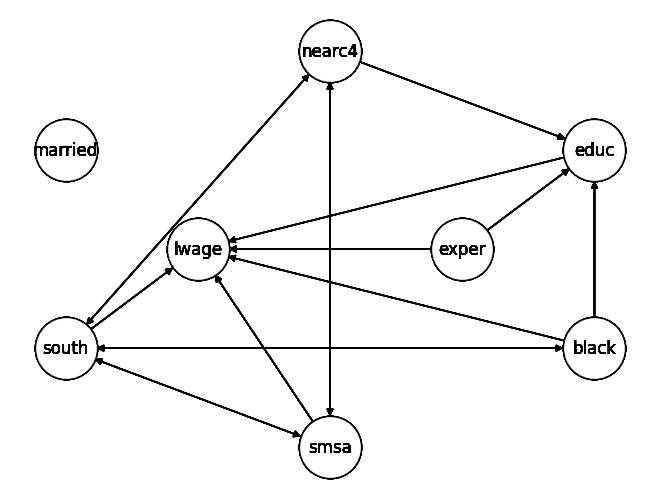

In [36]:

from itertools import permutations

def check_GES(file):
    graph = nx.read_gml(file)
    nx.draw(graph, with_labels=True, node_size=2000, node_color='w', edgecolors ='black', pos=pos)    
    nodes = ['nearc4', 'south', 'smsa','black']
    node_combo =  list(permutations(nodes, 3))

    for pos_v in node_combo:
        if (pos_v[0], pos_v[1]) and (pos_v[2], pos_v[1]) in graph.edges():
           
            if (pos_v[0], pos_v[1]) or (pos_v[1], pos_v[0]) not in graph.edges():
                # print(f"{file} contains V-structure")
                return False
            
    return True

def check_all_GES(folder):
    files = os.listdir(folder)
    files = [f'{folder}/{file}' for file in files]
    results = [check_GES(file) for file in files]
    return results


    

res = check_all_GES("graph_files/PC_CPDAG_graphs")
print(Counter(res))

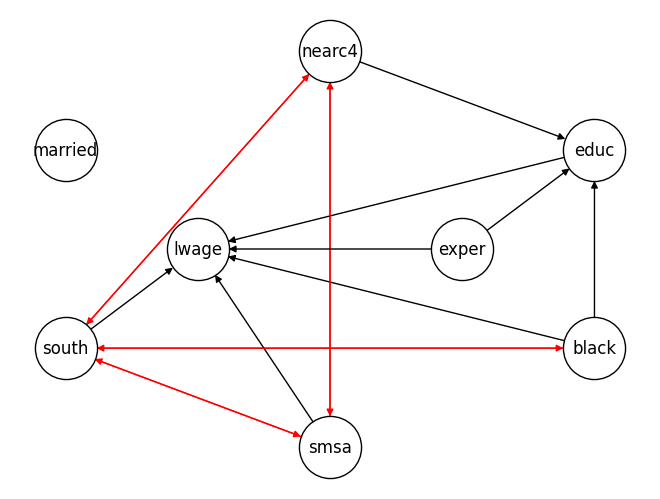

In [34]:
pc_graph_pk = nx.read_gml("graph_files/pc_graph_pk.gml")
colors = ['red'  if (y,x) in pc_graph_pk.edges() else 'black' for (x,y) in pc_graph_pk.edges()]
nx.draw(pc_graph_pk, with_labels=True, node_size=2000, node_color='w', edgecolors ='black', pos=pos, edge_color=colors)

##### PC without prior knowlegde

In [17]:
pc_graph_withoutPK = nx.read_gml("graph_files/pc_graph_withoutPK.gml")
res = get_all_dags(pc_graph_withoutPK, 'graph_files/PC_withoutPK_CPDAG_graphs')
print(Counter(res))

[[('nearc4', 'smsa'), ('smsa', 'nearc4')], [('nearc4', 'south'), ('south', 'nearc4')], [('black', 'south'), ('south', 'black')], [('smsa', 'south'), ('south', 'smsa')]]
There are 12 DAGs of the 16 possibile graph when directing the undirected edges.
Counter({False: 16})


##### GES

In [32]:

from itertools import permutations

def check_GES(file):
    graph = nx.read_gml(file)
    nodes = ['nearc4', 'lwage', 'married', 'smsa','exper']
    node_combo =  list(permutations(nodes, 3))

    for pos_v in node_combo:
        if (pos_v[0], pos_v[1]) and (pos_v[2], pos_v[1]) in graph.edges():
           
            if (pos_v[0], pos_v[1]) or (pos_v[1], pos_v[0]) not in graph.edges():
                # print(f"{file} contains V-structure")
                return False
            
    return True

def check_all_GES(folder):
    files = os.listdir(folder)
    files = [f'{folder}/{file}' for file in files]
    results = [check_GES(file) for file in files]
    return results


    

res = check_all_GES("graph_files/GES_CPDAG_graphs")
print(Counter(res))

Counter({False: 54})


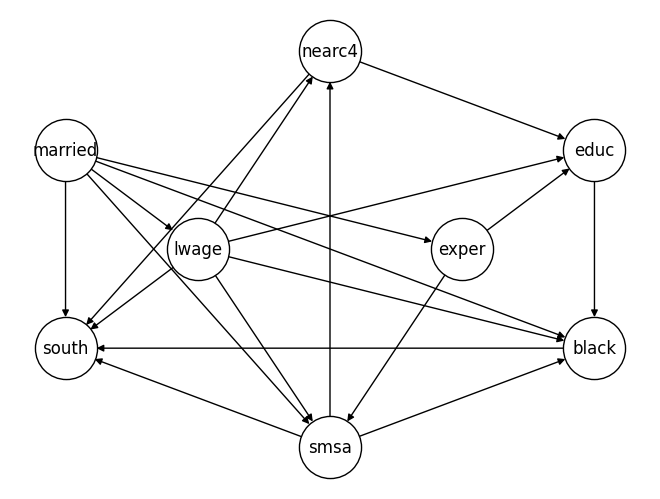

In [27]:
dag = nx.read_gml("graph_files/GES_CPDAG_graphs/dag4.gml")
colors = ['red'  if (y,x) in dag.edges() else 'black' for (x,y) in dag.edges()]
nx.draw(dag, with_labels=True, node_size=2000, node_color='w', edgecolors ='black', pos=pos, edge_color=colors)

In [19]:
GES_cpdag = nx.read_gml("graph_files/cdt_gres_graph.gml")
res = get_all_dags(GES_cpdag, 'graph_files/GES_CPDAG_graphs')
print(Counter(res))

[[('nearc4', 'smsa'), ('smsa', 'nearc4')], [('nearc4', 'lwage'), ('lwage', 'nearc4')], [('smsa', 'married'), ('married', 'smsa')], [('smsa', 'exper'), ('exper', 'smsa')], [('smsa', 'lwage'), ('lwage', 'smsa')], [('married', 'exper'), ('exper', 'married')], [('married', 'lwage'), ('lwage', 'married')]]


KeyboardInterrupt: 

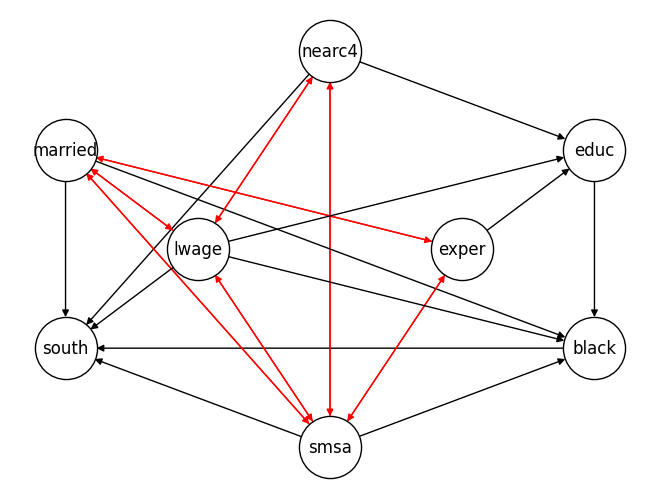

In [20]:
colors = ['red'  if (y,x) in GES_cpdag.edges() else 'black' for (x,y) in GES_cpdag.edges()]
nx.draw(GES_cpdag, with_labels=True, node_size=2000, node_color='w', edgecolors ='black', pos=pos, edge_color=colors)

In [ ]:
# dag = nx.read_gml("graph_files/GES_CPDAG_graphs/dag4.gml")
# colors = ['red'  if (y,x) in dag.edges() else 'black' for (x,y) in dag.edges()]
# nx.draw(dag, with_labels=True, node_size=2000, node_color='w', edgecolors ='black', pos=pos, edge_color=colors)